# Exercise 5

If the law of the response is constant in t for each x in the neighborhood of x, the responses are not subject to change with different treatmetns when x's are similar. 

Then you can define a response function with the same law, that does not depend on t.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.polynomial.polynomial import polyfit
sns.set(style="darkgrid")

$$R | X=x, T = t \sim N(\alpha + \beta*x; \sigma^2)$$

$$\rho(v,x,t) = \alpha + \beta * x + \gamma * t * \mathbb{1}_F (v) + \Phi^{-1}(v)*\sigma $$

In [34]:
from scipy.stats import norm

n_samples = 2000
x=np.random.randint(0,2,n_samples)
#t=np.array([int(np.random.randint(0,11)<8) if _x==1 else int(np.random.randint(0,11)<3) for _x in x])
t=np.random.randint(0,2,n_samples)
def rho(v,x,t):
    # change np.where(v==0.5,1,0) to np.where(v<=0.5,1,0) to simulate a treatment effect
    return 0.5 + 0.1*x + 10.38272*t*np.where(v==0.5,1,0) + norm.ppf(v) * 1

v = np.random.uniform(size=n_samples)
rhos = rho(v,x,t)

df = pd.DataFrame({'x':x,'t':t,'v':v,'rho':rhos})



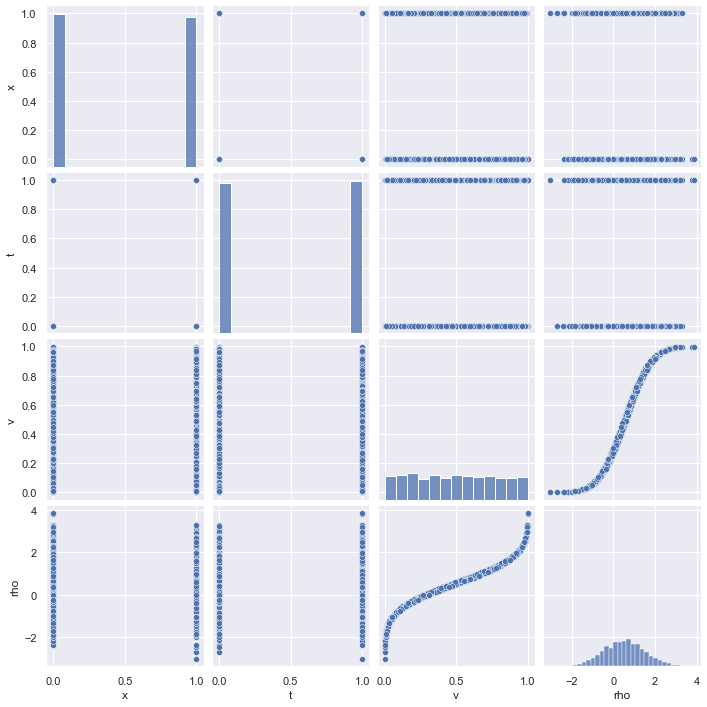

In [35]:
sns.pairplot(df)

mean 0.5349006237945582, std 1.015292927001727
should be mean alpha + beta x = 0.5495, std 1


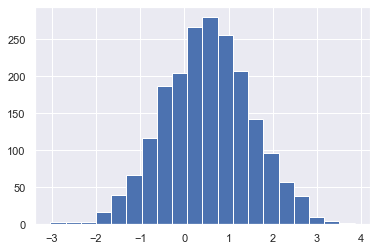

In [36]:
# R | X=x,T=t

df['rho'].hist(bins=20);
data = df[(df.x==0) & (df.t==0)]['rho']
print(f'mean {data.mean()}, std {data.std()}')
print(f'should be mean alpha + beta x = {np.mean(0.5+0.1*x)}, std 1')

In [37]:
def rho_tilde(v,x,t): 
    return norm.ppf(v) * 1 + 0.5 + 0.1*x

rhos_tilde = rho_tilde(v,x,t)
df['rho_tilde'] = rhos_tilde


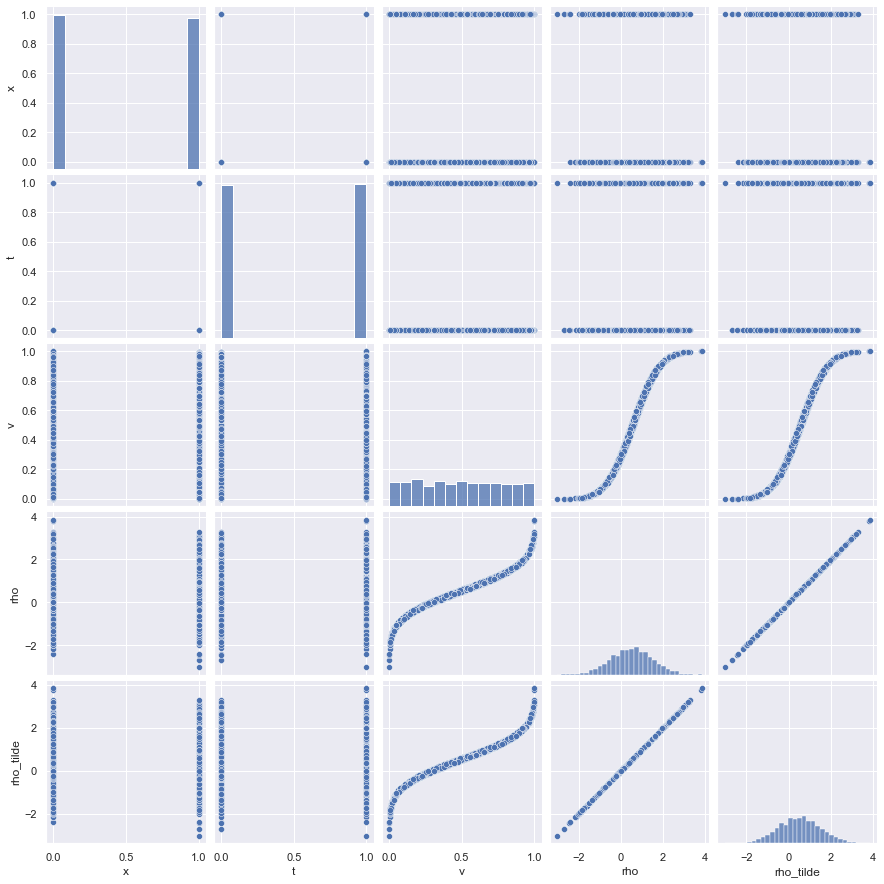

In [38]:
sns.pairplot(df)

In [40]:
# P (R <= r | X=x,T=x)

data = df[(df.x==0) & (df.t == 0)]
print(f'p(R<=0.6|x,t) = {(data.rho_tilde <= 0.6).sum()/len(data)}')
prob = norm.cdf(0.6, loc=np.mean(0.5+0.1*0))
print(f'should be {prob}')

p(R<=0.6|x,t) = 0.5059288537549407
should be 0.539827837277029
